In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('outputs/p1_merge_metadata.csv', index_col=0)
# Remove NA cell type
print(len(df))
df = df[df['type_lvl1'].notna()]
df

648857


,ORIG_ID,X,Y,type_lvl1,type_lvl2,f,agg_id,spatial_cluster,hubID,hubType
1,1,7086.413818,79.414864,Epithelial,Epithelial,1.189615,2,0,H260,tumor
2,3,7087.515381,-21.805606,Epithelial,Epithelial,1.074691,1,13,H260,tumor
3,4,7099.331055,-17.703966,Epithelial,Epithelial,2.322399,1,13,H260,tumor
4,5,7100.476562,-9.060024,Epithelial,Epithelial,1.236350,1,13,H260,tumor
5,6,7093.215332,-5.783358,Epithelial,Epithelial,1.425693,1,13,H260,tumor
...,...,...,...,...,...,...,...,...,...,...
648850,642666,12443.519531,10385.104492,Lymphocyte,CD4 T,2.217943,20932,6,H853,hybrid_hub
648851,642668,12455.890625,10428.591309,Lymphocyte,Treg,1.314869,20932,6,H853,hybrid_hub
648852,642670,12457.069336,10471.588867,Lymphocyte,CD4 T,1.516320,10571,6,H853,hybrid_hub
648855,642673,12450.903320,10448.802246,Fibroblast,Fibroblast,1.228548,10571,6,H853,hybrid_hub


In [166]:
cl6 = df[df['spatial_cluster']==6]
cl6[:10]

,ORIG_ID,X,Y,type_lvl1,type_lvl2,f,agg_id,spatial_cluster,hubID,hubType
730,1335,7125.049072,5404.034668,Fibroblast,Fibroblast,1.710623,89,6,H260,tumor
731,1336,7122.731445,5413.243896,Lymphocyte,CD8 T,1.692846,89,6,H260,tumor
760,1400,7136.069580,5405.049072,Lymphocyte,CD4 T,2.134899,89,6,H260,tumor
768,1419,7128.755127,5410.668701,Fibroblast,Fibroblast,2.468808,89,6,H260,tumor
1070,1859,7112.610107,6136.947754,Fibroblast,Fibroblast,1.593510,118,6,H260,tumor
1084,1878,7150.931641,6049.573975,Fibroblast,Fibroblast,1.624982,111,6,H260,tumor
1089,1886,7109.541992,6085.624512,Fibroblast,Fibroblast,1.862139,111,6,H260,tumor
1090,1887,7110.013916,6091.518555,Plasma,Plasma,1.396651,111,6,H260,tumor
1091,1889,7104.443848,6095.941650,Lymphocyte,CD4 T,1.948233,111,6,H260,tumor
1092,1890,7098.530029,6091.985107,Myeloid,FOLR2+CD14+ Macrophage,1.740208,111,6,H260,tumor


In [168]:
cl6.agg_id.value_counts()[:10]

agg_id
14116    56
14820    56
14025    53
5028     52
14562    51
12327    50
18736    50
17068    50
3779     50
14148    50
Name: count, dtype: int64

In [161]:
cl6[cl6['hubID']=='H286'].agg_id.value_counts()

agg_id
1625     38
13157    36
1744     36
1493     35
1404     34
         ..
1853      1
1835      1
1737      1
1839      1
1423      1
Name: count, Length: 65, dtype: int64

,ORIG_ID,X,Y,type_lvl1,type_lvl2,f,agg_id,spatial_cluster,hubID,hubType
485823,479853,9824.788086,11840.912598,Vascular,Vascular,4.137961,15632,4,H455,vascular
485932,479976,9830.430176,11845.162598,Vascular,Vascular,4.218979,15632,4,H455,vascular
486498,481017,9958.556152,11766.604492,Vascular,Vascular,3.243379,15632,4,H455,vascular
486506,481043,9957.573242,11774.379883,Vascular,Vascular,2.904670,15632,4,H455,vascular
486527,481107,9963.423340,11771.774902,Vascular,Vascular,3.133102,15632,4,H455,vascular


In [4]:
def plot_tile(plot_data, title, by_type='hubID', size=20, alpha=1, box_pos='upper left', \
              box_anchor=(1,1), legend_marker_size=10, legend_pos='upper left'):
    """
    plot_data (pd.DataFrame): Dataframe used for plotting. Headers: X, Y, type_lvl1, type_lvl, f,
        agg_id, spatial_cluster, hubID, hubType.
    title (str): Plot title
    by_type (str): Which type to color by
    """
    ax = sns.scatterplot(data=plot_data, x='X', y='Y', hue=by_type, s=size, alpha=alpha)
    ax.set(xlabel=None, xticklabels=[], ylabel=None, yticklabels=[], title=title)
    sns.move_legend(ax, legend_pos, bbox_to_anchor=box_anchor)
    #get legend and change stuff
    handles, labels = ax.get_legend_handles_labels()
    for h in handles:
        h.set_markersize(legend_marker_size)
        h.set_alpha(alpha)
    lgnd = plt.legend(handles, labels, bbox_to_anchor=box_anchor, loc=legend_pos, borderaxespad=0)

    return ax

<Axes: title={'center': 'Cluster [4] - Agg_id 15140'}>

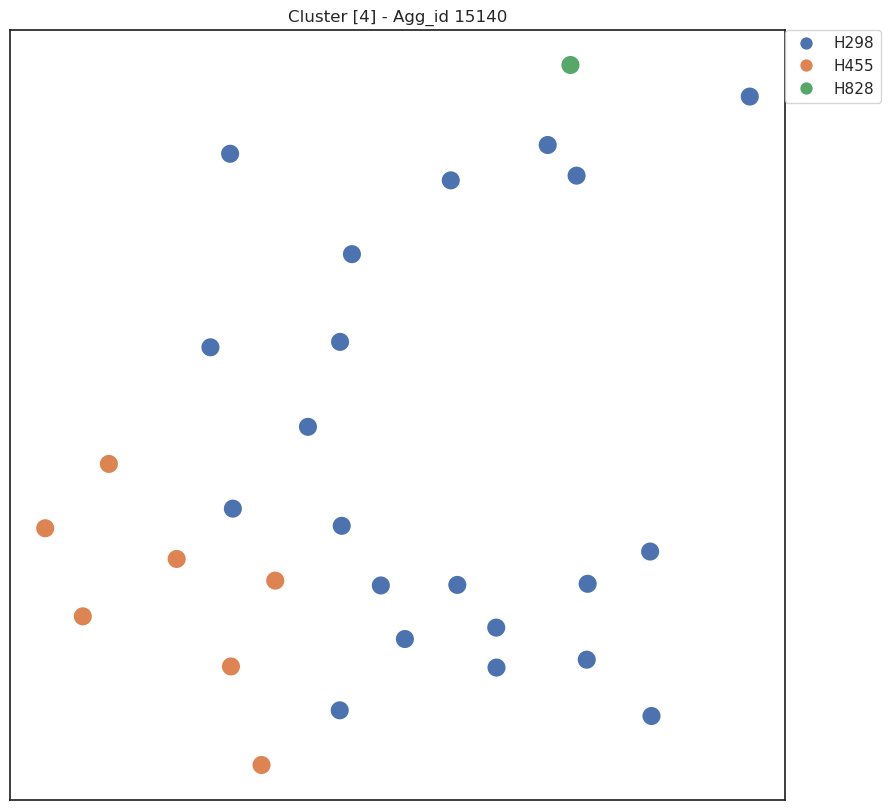

In [277]:
id_ = 15140
plot_data = df[df['agg_id']==id_]
cluster = plot_data['spatial_cluster'].unique()
plot_tile(plot_data, 'Cluster {} - Agg_id {}'.format(cluster, id_), size=200)

agg_id
15142    43
15145    37
15144    34
15139    32
15141    21
15138    15
15143    13
15147     9
15146     8
15129     7
15152     6
15150     5
15161     4
15151     3
15158     2
15140     1
Name: count, dtype: int64


<Axes: title={'center': 'H828'}>

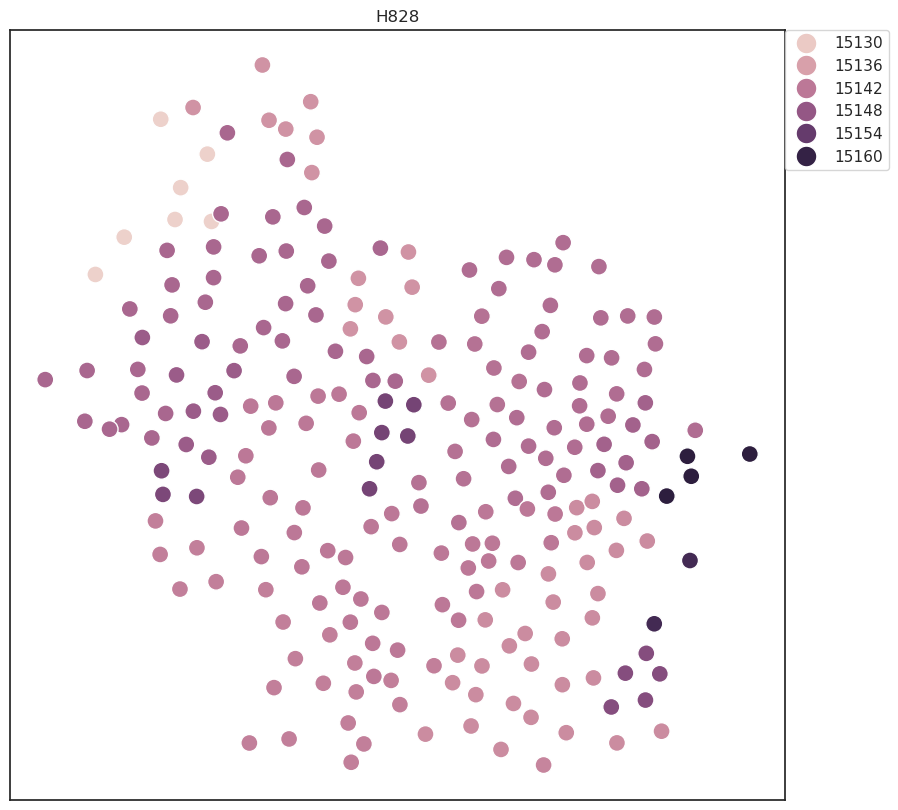

In [276]:
hub_id = 'H828'
print(df[df.hubID==hub_id].agg_id.value_counts())
plot_tile(df[df['hubID']==hub_id], title=hub_id, by_type='agg_id', size=150, legend_marker_size=15)

In [275]:
df

,ORIG_ID,X,Y,type_lvl1,type_lvl2,f,agg_id,spatial_cluster,hubID,hubType
1,1,7086.413818,79.414864,Epithelial,Epithelial,1.189615,2,0,H260,tumor
2,3,7087.515381,-21.805606,Epithelial,Epithelial,1.074691,1,13,H260,tumor
3,4,7099.331055,-17.703966,Epithelial,Epithelial,2.322399,1,13,H260,tumor
4,5,7100.476562,-9.060024,Epithelial,Epithelial,1.236350,1,13,H260,tumor
5,6,7093.215332,-5.783358,Epithelial,Epithelial,1.425693,1,13,H260,tumor
...,...,...,...,...,...,...,...,...,...,...
648850,642666,12443.519531,10385.104492,Lymphocyte,CD4 T,2.217943,20932,6,H853,hybrid_hub
648851,642668,12455.890625,10428.591309,Lymphocyte,Treg,1.314869,20932,6,H853,hybrid_hub
648852,642670,12457.069336,10471.588867,Lymphocyte,CD4 T,1.516320,10571,6,H853,hybrid_hub
648855,642673,12450.903320,10448.802246,Fibroblast,Fibroblast,1.228548,10571,6,H853,hybrid_hub


<Axes: title={'center': 'Cluster [6] - Agg_id 8584'}>

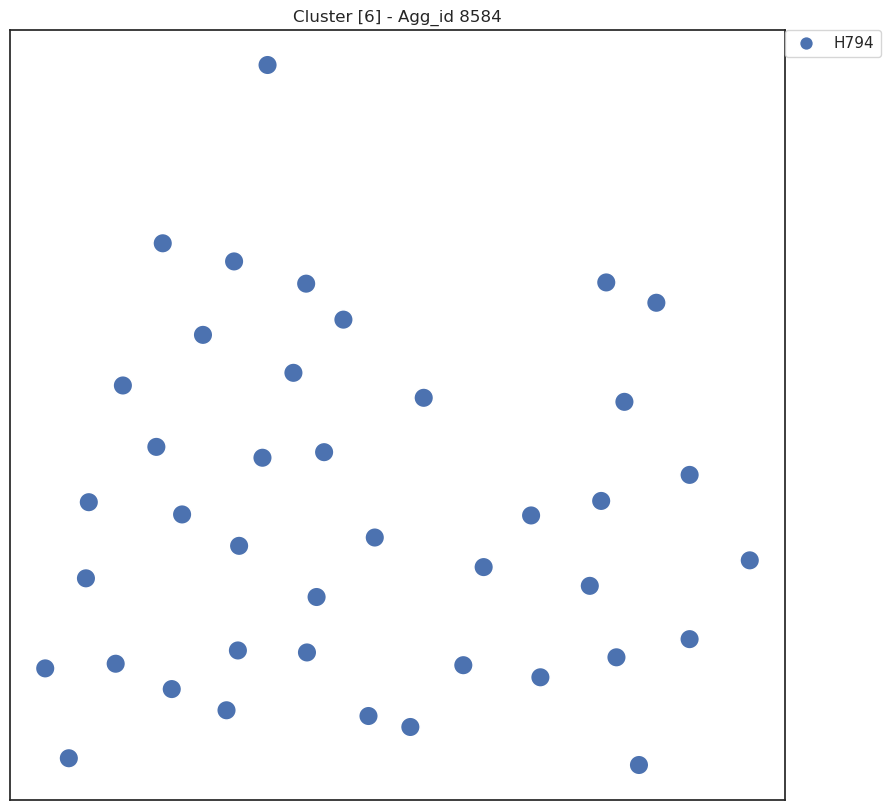

In [258]:
id_ = 8584
plot_data = df[df['agg_id']==id_]
cluster = plot_data['spatial_cluster'].unique()
plot_tile(plot_data, 'Cluster {} - Agg_id {}'.format(cluster, id_), size=200)

In [260]:
df[df['hubType']=='hybrid_hub'].hubID.value_counts()

hubID
H825    12406
H843     7387
H842     5992
H763     5916
H803     1991
H799     1959
H775     1867
H806     1618
H768     1304
H772      964
H776      945
H794      750
H774      573
H784      556
H807      535
H835      496
H805      454
H810      439
H781      410
H838      386
H783      372
H834      358
H845      323
H853      299
H850      257
H773      247
H824      244
H828      240
H802      221
H841      217
H790      184
H769      170
H765      162
H812      148
H779      145
H793      134
H829      127
H839      114
H808      111
H797      102
H836       94
H832       94
H840       82
H830       79
H764       78
H800       74
H822       70
H795       57
H796       57
H827       54
H851       52
H846       52
H766       48
H837       47
H823       34
H804       32
H801       29
H792       27
H767       26
H785       21
Name: count, dtype: int64

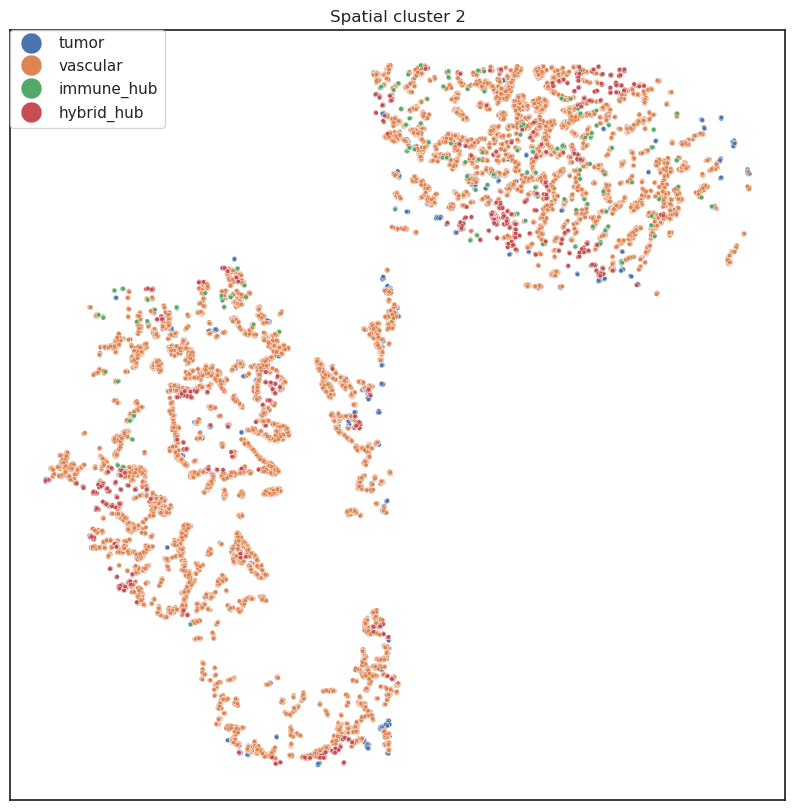

In [267]:
cl2 = df[df['spatial_cluster']==2]
sns.set_theme(rc={'figure.figsize':(10,10)}, style="white")

plot_tile(cl2, title='Spatial cluster 2', by_type='hubType', size=10, alpha=1, \
          box_anchor=(0,1), legend_marker_size=15)
plt.savefig('outputs/p1_cluster2.png')

In [ ]:
# Get a hybrid hub from the previous tile classification


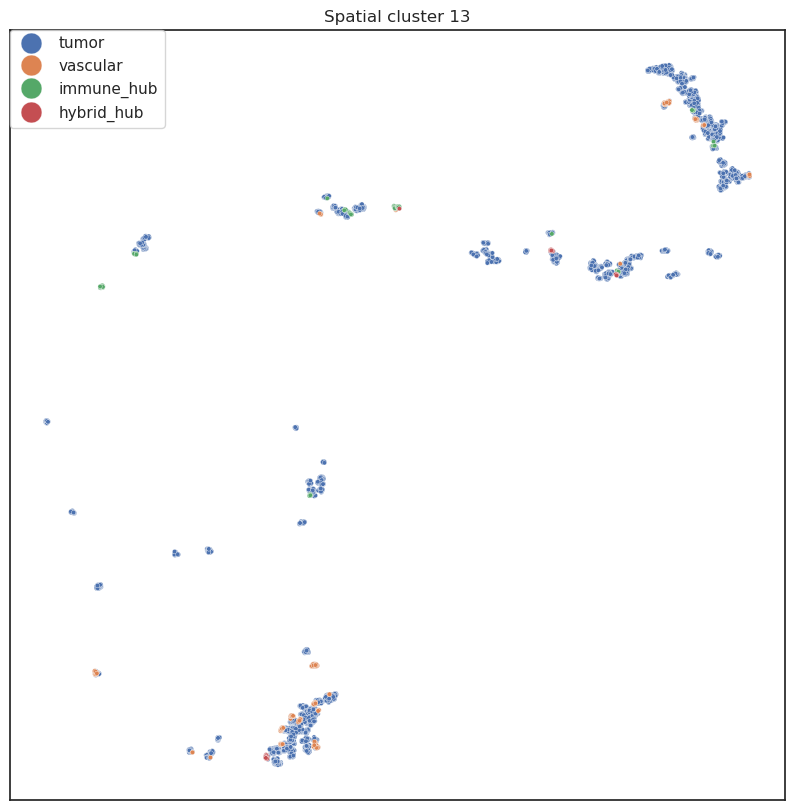

In [17]:
clust = 13
cl = df[df['spatial_cluster']==clust]
sns.set_theme(rc={'figure.figsize':(10,10)}, style="white")

plot_tile(cl, title='Spatial cluster {}'.format(clust), by_type='hubType', size=10, alpha=1, \
          box_anchor=(0,1), legend_marker_size=15)
plt.savefig('outputs/p1_cluster{}.png'.format(clust))

Text(0.5, 1.0, 'Number of cells in previous hubs')

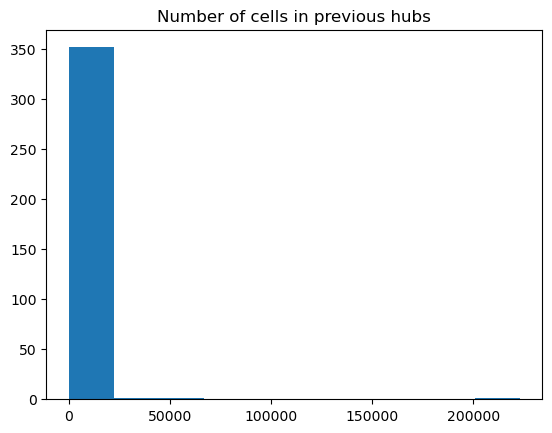

In [107]:
plt.hist(df.hubID.value_counts())
plt.title('Number of cells in previous hubs')

Text(0.5, 1.0, 'Number of cells in previous hubs (range: 0 - 1000)')

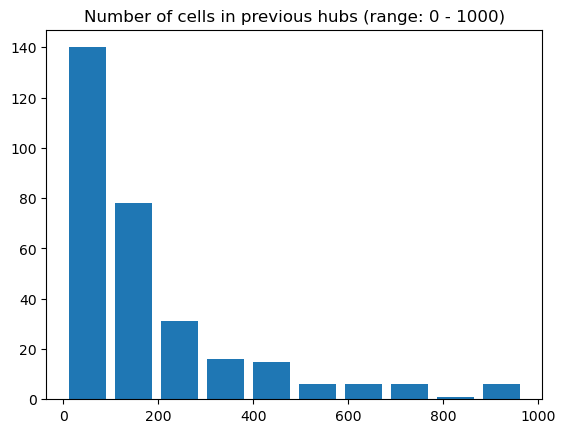

In [120]:
# Zoom in this histogram
plt.hist(df.hubID.value_counts()[50:], rwidth=0.8)
plt.title('Number of cells in previous hubs (range: 0 - 1000)')

In [115]:
df.hubID.value_counts()[20:]

hubID
H432    3026
H346    2842
H392    2623
H340    2423
H405    2261
        ... 
H500      10
H327       8
H469       7
H337       4
H332       2
Name: count, Length: 335, dtype: int64

Text(0.5, 1.0, 'Number of cells in Cygnus tiles')

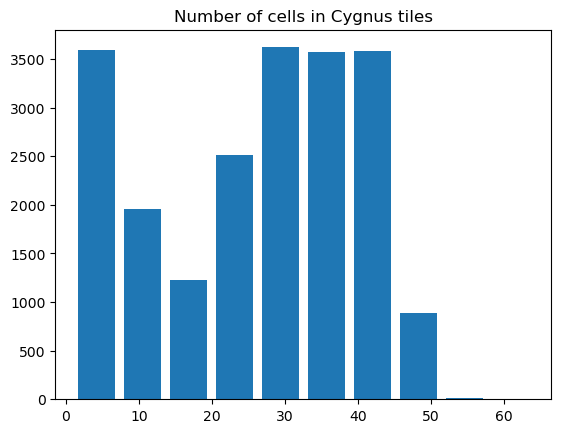

In [111]:
plt.hist(df.agg_id.value_counts(), rwidth=0.8)
plt.title("Number of cells in Cygnus tiles")

(array([381.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 9.2990e+02, 1.8588e+03, 2.7877e+03, 3.7166e+03,
        4.6455e+03, 5.5744e+03, 6.5033e+03, 7.4322e+03, 8.3611e+03,
        9.2900e+03]),
 <BarContainer object of 10 artists>)

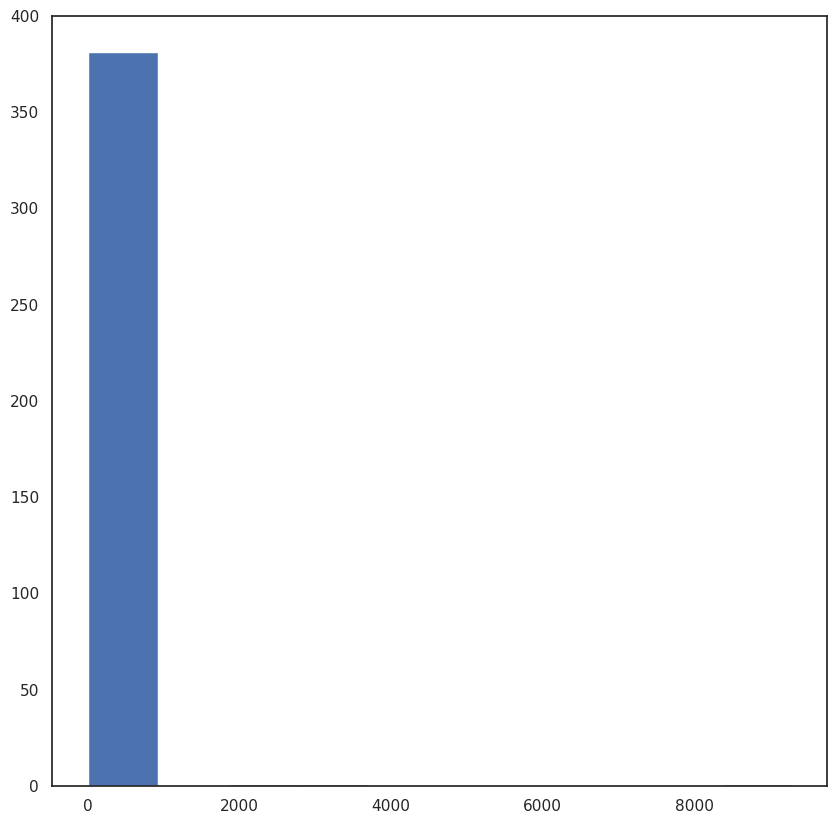

In [298]:
# What's the distribution of the number of Cygnus tile within each hub?
n_aggs = np.array([df[df['hubID']==hubname].agg_id.nunique() for hubname in df.hubID.unique()])



Text(0.5, 1.0, 'Number of Cygnus aggregations in each hub (95 percentile)')

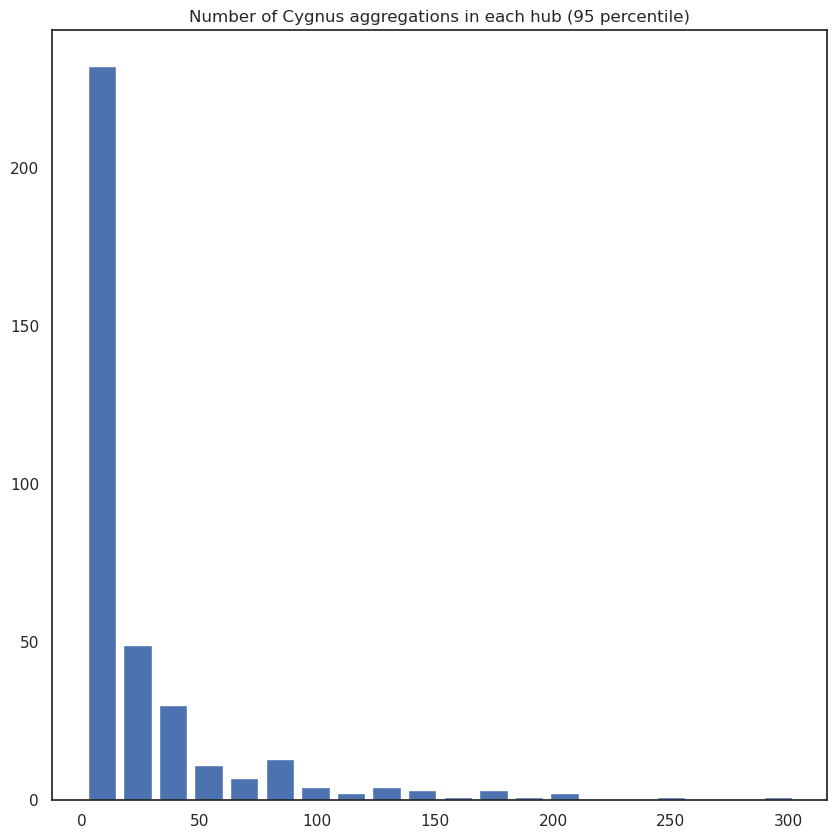

In [308]:
plt.hist(n_aggs[n_aggs <= np.percentile(n_aggs, 95)], bins=20, rwidth=0.8)
plt.title('Number of Cygnus aggregations in each hub (95 percentile)')

In [ ]:
# How about diversity within each hub vs. Cygnus tile?